<a href="https://colab.research.google.com/github/prt180/tensorflow/blob/main/introtoCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN and Computer vision with tensorflow.

Computer is the practice of writing algo which can discover patterns in visual data.

## Get the data

Data from food 101 dataset

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-10-18 20:25:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.145.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  53.8MB/s    in 1.9s    

2022-10-18 20:26:00 (53.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspecting the data (become one with it)

In [3]:
!ls pizza_steak

test  train


In [4]:
import os

# Walk through pizza steak dir and list no. of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [5]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Oct 18 20:26 .
drwxr-xr-x 1 root root 4096 Oct 18 20:26 ..
drwxr-xr-x 4 root root 4096 Oct 18 20:26 test
drwxr-xr-x 4 root root 4096 Oct 18 20:26 train


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

# To Visualize our images, first let's get the class names programmatically.

In [7]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza _steak/test")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectory 
class_names

array([], dtype=float64)

In [8]:
class_names = np.array(sorted(os.listdir("pizza_steak/train")))

In [9]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [10]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1) # random img path

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


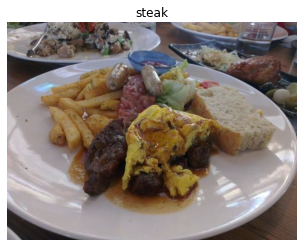

In [11]:
# View random image from training dataset 

img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 83,  85,  63],
        [108, 110,  88],
        [107, 109,  87],
        ...,
        [114,  93, 108],
        [115,  94, 109],
        [112,  91, 108]],

       [[ 65,  67,  45],
        [ 99, 101,  79],
        [121, 125, 102],
        ...,
        [111,  94, 104],
        [108,  90, 102],
        [104,  86,  98]],

       [[ 54,  58,  35],
        [ 74,  78,  55],
        [113, 117,  94],
        ...,
        [104,  92,  96],
        [101,  89,  93],
        [ 99,  86,  93]],

       ...,

       [[130, 130, 140],
        [131, 131, 141],
        [132, 132, 142],
        ...,
        [ 88,  71,  64],
        [ 83,  68,  61],
        [ 81,  66,  59]],

       [[131, 131, 141],
        [131, 131, 141],
        [131, 131, 141],
        ...,
        [ 91,  74,  67],
        [ 86,  71,  64],
        [ 84,  69,  62]],

       [[130, 130, 140],
        [131, 131, 141],
        [131, 131, 141],
        ...,
        [ 89,  72,  6

In [13]:
# View the image shape
img.shape # returns width, height, colour channels

(384, 512, 3)

In [14]:
img/255

array([[[0.3254902 , 0.33333333, 0.24705882],
        [0.42352941, 0.43137255, 0.34509804],
        [0.41960784, 0.42745098, 0.34117647],
        ...,
        [0.44705882, 0.36470588, 0.42352941],
        [0.45098039, 0.36862745, 0.42745098],
        [0.43921569, 0.35686275, 0.42352941]],

       [[0.25490196, 0.2627451 , 0.17647059],
        [0.38823529, 0.39607843, 0.30980392],
        [0.4745098 , 0.49019608, 0.4       ],
        ...,
        [0.43529412, 0.36862745, 0.40784314],
        [0.42352941, 0.35294118, 0.4       ],
        [0.40784314, 0.3372549 , 0.38431373]],

       [[0.21176471, 0.22745098, 0.1372549 ],
        [0.29019608, 0.30588235, 0.21568627],
        [0.44313725, 0.45882353, 0.36862745],
        ...,
        [0.40784314, 0.36078431, 0.37647059],
        [0.39607843, 0.34901961, 0.36470588],
        [0.38823529, 0.3372549 , 0.36470588]],

       ...,

       [[0.50980392, 0.50980392, 0.54901961],
        [0.51372549, 0.51372549, 0.55294118],
        [0.51764706, 0

## An end-to-end example 

CNN steps :
* load images
* preprocess images
* build cnn to find patterns 
* compile cnn 
* fit cnn to training data

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed 
tf.random.set_seed(42)

# Preprocess data (get all pixel btwn 0 to 1, also called scaling or normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)
 
# Setup paths to our data dir
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"


# Import data from dir and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                            batch_size=32,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            seed=42)

# Build CNN model 

model_0 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='same'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
      
])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [51]:
# Compile CNN
model_0.compile(loss="binary_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_0 = model_0.fit(train_data, epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))



Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 0.5871 - accuracy: 0.6587 - val_loss: 0.3846 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4243 - accuracy: 0.8047 - val_loss: 0.3623 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3877 - accuracy: 0.8360 - val_loss: 0.3236 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3583 - accuracy: 0.8460 - val_loss: 0.3116 - val_accuracy: 0.8880
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3106 - accuracy: 0.8740 - val_loss: 0.2957 - val_accuracy: 0.8820


In [17]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Non CNN Model for image data

In [18]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)), 
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 241ms/step - loss: 0.7127 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000


In [19]:
history_0

In [20]:
model_1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [87]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_2 = model_2.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 2.1015 - accuracy: 0.5880 - val_loss: 0.7402 - val_accuracy: 0.6560
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6260 - accuracy: 0.7173 - val_loss: 0.4537 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.5509 - accuracy: 0.7540 - val_loss: 0.4320 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.5084 - accuracy: 0.7727 - val_loss: 0.4660 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4999 - accuracy: 0.7753 - val_loss: 0.6304 - val_accuracy: 0.7280


In [22]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,083,301
Trainable params: 15,083,301


## Binary classifiacation: Let's break it down
1. Become one with data(visualize, visualize, visualize)
2. Preprocess the data(scaling and normalizing)
3. Create the model 
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied(experiment, experiment, experiment)


### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 382, 3)


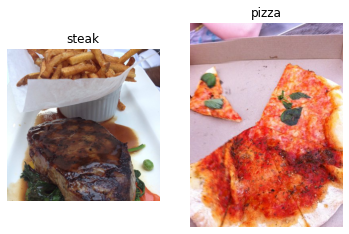

In [23]:
# Visualize data

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


In [29]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [30]:
train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [37]:
# get a sample of a train data batch
images, labels = train_data.next() 
len(images), len(labels)

(32, 32)

In [38]:
# how many batches are there?
len(train_data)

47

In [39]:
1500/32

46.875

In [46]:
# Get the first two images
images[:1], images[0].shape

(array([[[[0.16862746, 0.15686275, 0.13725491],
          [0.18431373, 0.16470589, 0.14901961],
          [0.19215688, 0.16470589, 0.14117648],
          ...,
          [0.16078432, 0.12156864, 0.1137255 ],
          [0.15686275, 0.12156864, 0.10196079],
          [0.16862746, 0.13333334, 0.1137255 ]],
 
         [[0.17254902, 0.15294118, 0.13725491],
          [0.18039216, 0.16078432, 0.13725491],
          [0.18431373, 0.15686275, 0.13333334],
          ...,
          [0.16470589, 0.12941177, 0.10980393],
          [0.16862746, 0.13333334, 0.10588236],
          [0.16078432, 0.1254902 , 0.09803922]],
 
         [[0.18431373, 0.16470589, 0.14117648],
          [0.19215688, 0.16470589, 0.14117648],
          [0.18823531, 0.16078432, 0.12941177],
          ...,
          [0.18823531, 0.14901961, 0.1137255 ],
          [0.16470589, 0.1254902 , 0.09019608],
          [0.15686275, 0.11764707, 0.08235294]],
 
         ...,
 
         [[0.87843144, 0.37254903, 0.34901962],
          [0.87058

In [45]:
# View the labels of first batch 
labels

array([1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

### Create a CNN model (start with baseline)

In [47]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras import Sequential

In [55]:
base_model = Sequential([
    Conv2D(filters = 10, 
           kernel_size=3, strides=1, padding="same", # SAME gives same output as input and VALID compress output.
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [49]:
base_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [60]:
base_model.compile(loss="binary_crossentropy", 
                   optimizer = Adam(),
                   metrics=["accuracy"])

In [61]:
base_history = base_model.fit(train_data, epochs=5,
               steps_per_epoch=len(train_data),
               validation_data=test_data,
               validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 200ms/step - loss: 0.1409 - accuracy: 0.9573 - val_loss: 0.4167 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.0233 - accuracy: 0.9980 - val_loss: 0.4384 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.0101 - accuracy: 0.9987 - val_loss: 0.4721 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.0105 - accuracy: 0.9993 - val_loss: 0.5228 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.5303 - val_accuracy: 0.8340


### Evalauting our model

In [66]:
# Plot the validation and training curves separately


def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  
  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuarcy")
  plt.xlabel("epochs")
  plt.legend()


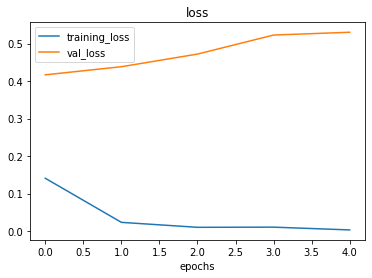

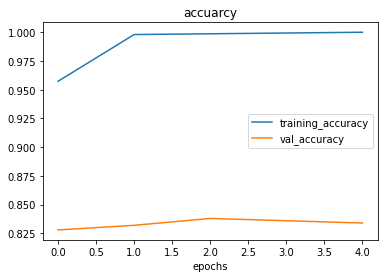

In [67]:
plot_loss_curves(base_history)

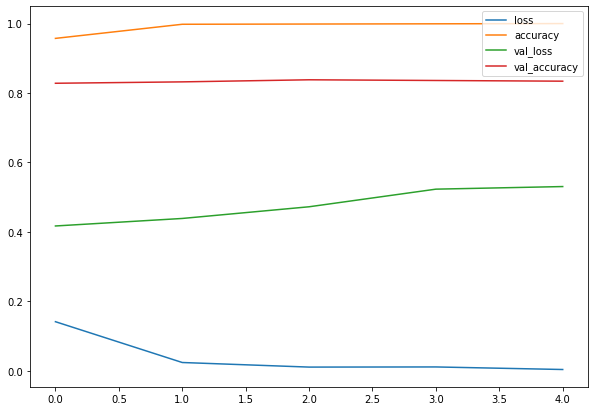

In [69]:
import pandas as pd
pd.DataFrame(base_history.history).plot(figsize=(10, 7))

### Adjust the model parameters

Ways to induce overfitting
* increase the no. of conv layers
* incerase the no. of conv filters
* Add another dense layer to the output of flattened layer

Reduce oberfitting
* add data augmentation
* add regularization layers (such as max pool)
* add more data ...

In [98]:
model_4 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [99]:
model_4.compile(loss="binary_crossentropy", optimizer = Adam(), metrics = ["accuracy"])

In [100]:
history_4 = model_4.fit(train_data,
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)) 

Epoch 1/5
47/47 [==============================] - 11s 221ms/step - loss: 0.6154 - accuracy: 0.6707 - val_loss: 0.5352 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.5029 - accuracy: 0.7660 - val_loss: 0.4036 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4106 - accuracy: 0.8153 - val_loss: 0.3731 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3884 - accuracy: 0.8233 - val_loss: 0.3305 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3692 - accuracy: 0.8460 - val_loss: 0.3458 - val_accuracy: 0.8560


In [101]:
model_4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 26, 26, 10)     

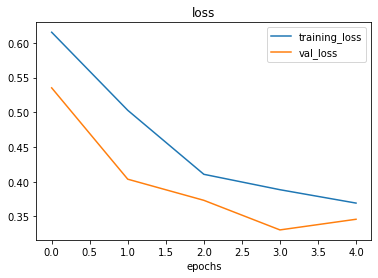

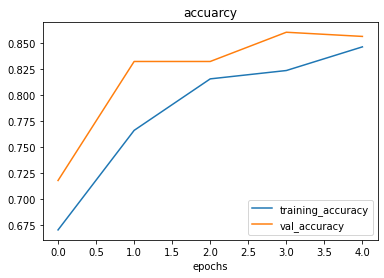

In [102]:
plot_loss_curves(history_4)

### Data augmentation

In [137]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, shear_range=0.2, zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [138]:
print("augmented data")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=False)
print("Non augmented data")
train_data = train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
test_data = test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary")


augmented data
Found 1500 images belonging to 2 classes.
Non augmented data
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [114]:
images, labels = train_data.next()
augmneted_images, augmented_labels = train_data_augmented.next()

2


<Figure size 432x288 with 0 Axes>

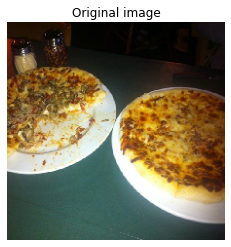

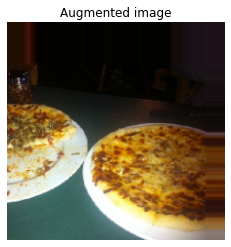

<Figure size 432x288 with 0 Axes>

In [126]:
# show the original images
random_number = random.randint(0,31) # batch size
plt.imshow(images[random_number])
print(random_number)
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmneted_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)
plt.figure()

# Data Augmentation 

In [129]:
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation= "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [132]:
model_5.compile(loss="binary_crossentropy", 
                optimizer=Adam(),
                metrics=["accuracy"])
history_5 = model_5.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 492ms/step - loss: 0.6996 - accuracy: 0.4673 - val_loss: 0.6821 - val_accuracy: 0.6220
Epoch 2/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6858 - accuracy: 0.5733 - val_loss: 0.6577 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 21s 453ms/step - loss: 0.6616 - accuracy: 0.6113 - val_loss: 0.5884 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6512 - accuracy: 0.6320 - val_loss: 0.5704 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 21s 457ms/step - loss: 0.6085 - accuracy: 0.6933 - val_loss: 0.4910 - val_accuracy: 0.8220


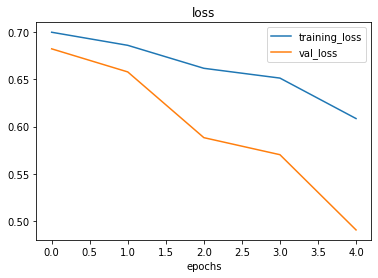

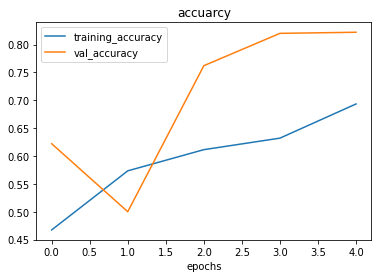

In [133]:
plot_loss_curves(history_5)

## Power of shuffle

In [139]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=True) # turn on shuffle 
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation= "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])
model_6.compile(loss="binary_crossentropy", 
                optimizer=Adam(),
                metrics=["accuracy"])
history_6 = model_6.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 466ms/step - loss: 0.6360 - accuracy: 0.6420 - val_loss: 0.5301 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 23s 500ms/step - loss: 0.5637 - accuracy: 0.7433 - val_loss: 0.5011 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 23s 477ms/step - loss: 0.5770 - accuracy: 0.7080 - val_loss: 0.4735 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5540 - accuracy: 0.7360 - val_loss: 0.4159 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 23s 488ms/step - loss: 0.5346 - accuracy: 0.7427 - val_loss: 0.4694 - val_accuracy: 0.8020


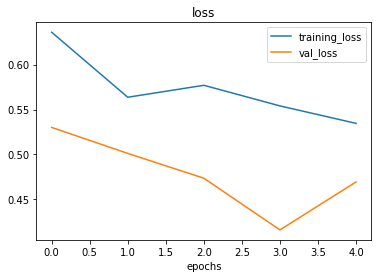

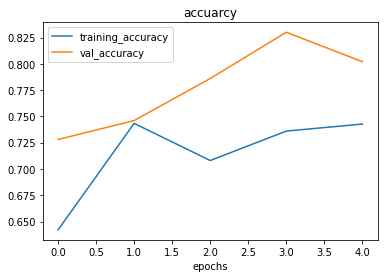

In [140]:
plot_loss_curves(history_6)

# Making a prediction with our trained model on our own custom data



In [ ]:
print(class_names)

--2022-10-18 23:47:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2022-10-18 23:47:54 (83.9 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

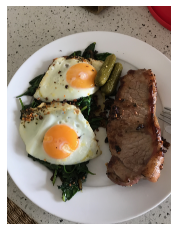

In [143]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)


In [147]:
steak.shape, steak

((4032, 3024, 3), array([[[162, 158, 149],
         [163, 159, 150],
         [166, 162, 153],
         ...,
         [136,  17,  23],
         [140,  21,  27],
         [140,  21,  27]],
 
        [[164, 160, 151],
         [164, 160, 151],
         [164, 160, 151],
         ...,
         [133,  14,  20],
         [134,  15,  21],
         [137,  18,  24]],
 
        [[166, 162, 153],
         [165, 161, 152],
         [163, 159, 150],
         ...,
         [136,  17,  23],
         [134,  15,  21],
         [136,  17,  23]],
 
        ...,
 
        [[154, 132, 109],
         [142, 122,  98],
         [101,  80,  59],
         ...,
         [165, 154, 148],
         [152, 141, 135],
         [140, 129, 123]],
 
        [[141, 119,  95],
         [139, 117,  93],
         [106,  86,  62],
         ...,
         [158, 147, 141],
         [142, 131, 125],
         [138, 127, 121]],
 
        [[148, 127, 100],
         [149, 127, 103],
         [114,  94,  70],
         ...,
         [1

In [148]:
tf.expand_dims(steak, axis=0)

<tf.Tensor: shape=(1, 4032, 3024, 3), dtype=uint8, numpy=
array([[[[162, 158, 149],
         [163, 159, 150],
         [166, 162, 153],
         ...,
         [136,  17,  23],
         [140,  21,  27],
         [140,  21,  27]],

        [[164, 160, 151],
         [164, 160, 151],
         [164, 160, 151],
         ...,
         [133,  14,  20],
         [134,  15,  21],
         [137,  18,  24]],

        [[166, 162, 153],
         [165, 161, 152],
         [163, 159, 150],
         ...,
         [136,  17,  23],
         [134,  15,  21],
         [136,  17,  23]],

        ...,

        [[154, 132, 109],
         [142, 122,  98],
         [101,  80,  59],
         ...,
         [165, 154, 148],
         [152, 141, 135],
         [140, 129, 123]],

        [[141, 119,  95],
         [139, 117,  93],
         [106,  86,  62],
         ...,
         [158, 147, 141],
         [142, 131, 125],
         [138, 127, 121]],

        [[148, 127, 100],
         [149, 127, 103],
         [114,  

In [150]:
model_6.predict(tf.expand_dims(steak, axis=0))

ValueError: ignored

In [151]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [152]:
steak = load_and_prep_image("03-steak.jpeg")

In [153]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [156]:
pred = model_6.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 25ms/step


In [158]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [159]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(True)

1/1 [==============================] - 0s 37ms/step


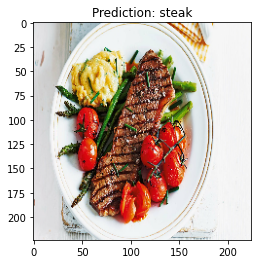

In [169]:
pred_and_plot(model_6, "xyz1.jpg")